In [2]:
import warnings;
warnings.simplefilter('ignore')

# 0. Install and Import Deps

In [4]:
!pip3 install pystan==2.19.1.1 fbprophet

In [6]:
import pandas as pd
from fbprophet import Prophet

# 1. Read in Data and Process Dates

In [7]:
df = pd.read_csv('dataset.csv.gz', compression='gzip')

In [8]:
df.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2021-07-22,AP,NaN,state,120403,1888,486,True,845731.0,861773.0,16.0,13971.54471,0.0157
1,2021-07-21,AP,NaN,state,120274,1887,485,False,845731.0,861773.0,16.0,13956.57557,0.0157
2,2021-07-20,AP,NaN,state,120153,1884,484,False,845731.0,861773.0,16.0,13942.53475,0.0157
3,2021-07-19,AP,NaN,state,120039,1883,483,False,845731.0,861773.0,16.0,13929.30621,0.0157
4,2021-07-18,AP,NaN,state,119899,1880,482,False,845731.0,861773.0,16.0,13913.06063,0.0157


In [19]:
dfsp = df[df['state']=='SP'] # filter data to show only SAO PAULO
dfsp.drop(['city', 'state', 'place_type', 'deaths', 'order_for_place', 'is_last', 'estimated_population_2019', 'estimated_population', 'city_ibge_code', 'confirmed_per_100k_inhabitants', 'death_rate'], axis=1, inplace=True)

In [22]:
dfsp.head()

,date,confirmed
2013131,2021-07-22,3979102
2013132,2021-07-21,3966009
2013133,2021-07-20,3947574
2013134,2021-07-19,3942776
2013135,2021-07-18,3939632


In [23]:
dfsp.groupby(['date'])
dfsp.head()

,date,confirmed
2013131,2021-07-22,3979102
2013132,2021-07-21,3966009
2013133,2021-07-20,3947574
2013134,2021-07-19,3942776
2013135,2021-07-18,3939632


In [26]:
dfsp.columns = ['ds', 'y']
dfsp.head()

,ds,y
2013131,2021-07-22,3979102
2013132,2021-07-21,3966009
2013133,2021-07-20,3947574
2013134,2021-07-19,3942776
2013135,2021-07-18,3939632


In [31]:
dfsp['ds'] = pd.DatetimeIndex(dfsp['ds'])

In [32]:
dfsp.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [33]:
dfsp.head()

,ds,y
2013131,2021-07-22,3979102
2013132,2021-07-21,3966009
2013133,2021-07-20,3947574
2013134,2021-07-19,3942776
2013135,2021-07-18,3939632


# 2. Train Model

In [39]:
m = Prophet(interval_width=0.95, daily_seasonality=True, yearly_seasonality=True)
model = m.fit(dfsp)

Initial log joint probability = -49266.5
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        906139     0.0537373        169135           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     182        907091   2.51262e-05       1075.96      0.7091      0.7091      221   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


# 3. Forecast Away

In [44]:
future = m.make_future_dataframe(periods=1826, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-25,-67218.947475,-259494.463905,62606.118412,-67218.947475,-67218.947475,-40558.770628,-40558.770628,-40558.770628,-268881.044042,...,-138.964328,-138.964328,-138.964328,228461.237742,228461.237742,228461.237742,0.0,0.0,0.0,-107777.718103
1,2020-02-26,-63276.543489,-270044.553811,61161.803384,-63276.543489,-63276.543489,-40118.899776,-40118.899776,-40118.899776,-268881.044042,...,79.109095,79.109095,79.109095,228683.035172,228683.035172,228683.035172,0.0,0.0,0.0,-103395.443265
2,2020-02-27,-59334.139503,-266174.871813,58250.048809,-59334.139503,-59334.139503,-39879.841078,-39879.841078,-39879.841078,-268881.044042,...,168.437426,168.437426,168.437426,228832.765538,228832.765538,228832.765538,0.0,0.0,0.0,-99213.980580
3,2020-02-28,-55391.735517,-247351.375647,73807.233128,-55391.735517,-55391.735517,-39903.218364,-39903.218364,-39903.218364,-268881.044042,...,68.695769,68.695769,68.695769,228909.129908,228909.129908,228909.129908,0.0,0.0,0.0,-95294.953881
4,2020-02-29,-51449.331531,-244288.487173,65599.766974,-51449.331531,-51449.331531,-40024.719446,-40024.719446,-40024.719446,-268881.044042,...,-54.563875,-54.563875,-54.563875,228910.888471,228910.888471,228910.888471,0.0,0.0,0.0,-91474.050977


In [45]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2327,2026-07-18,7.395012e+06,-1.183258e+07,2.426811e+07,-1.131607e+07,2.472259e+07,-466397.978600,-466397.978600,-466397.978600,-268881.044042,...,-54.563875,-54.563875,-54.563875,-197462.370683,-197462.370683,-197462.370683,0.0,0.0,0.0,6.928614e+06
2328,2026-07-19,7.398794e+06,-1.184058e+07,2.426713e+07,-1.133735e+07,2.474367e+07,-468989.802356,-468989.802356,-468989.802356,-268881.044042,...,-291.612749,-291.612749,-291.612749,-199817.145565,-199817.145565,-199817.145565,0.0,0.0,0.0,6.929804e+06
2329,2026-07-20,7.402575e+06,-1.167751e+07,2.435907e+07,-1.135863e+07,2.476474e+07,-470793.126062,-470793.126062,-470793.126062,-268881.044042,...,168.898662,168.898662,168.898662,-202080.980682,-202080.980682,-202080.980682,0.0,0.0,0.0,6.931782e+06
2330,2026-07-21,7.406356e+06,-1.187461e+07,2.430499e+07,-1.137992e+07,2.478582e+07,-473274.134825,-473274.134825,-473274.134825,-268881.044042,...,-138.964328,-138.964328,-138.964328,-204254.126456,-204254.126456,-204254.126456,0.0,0.0,0.0,6.933082e+06
2331,2026-07-22,7.410138e+06,-1.188098e+07,2.435450e+07,-1.140120e+07,2.480674e+07,-475138.890446,-475138.890446,-475138.890446,-268881.044042,...,79.109095,79.109095,79.109095,-206336.955499,-206336.955499,-206336.955499,0.0,0.0,0.0,6.934999e+06


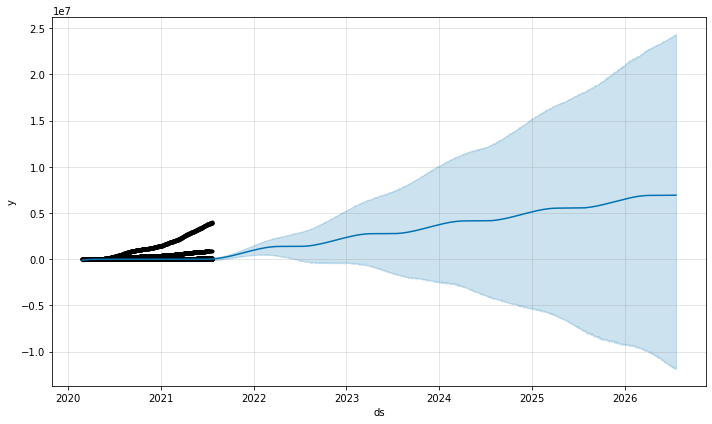

In [46]:
plot1 = m.plot(forecast)

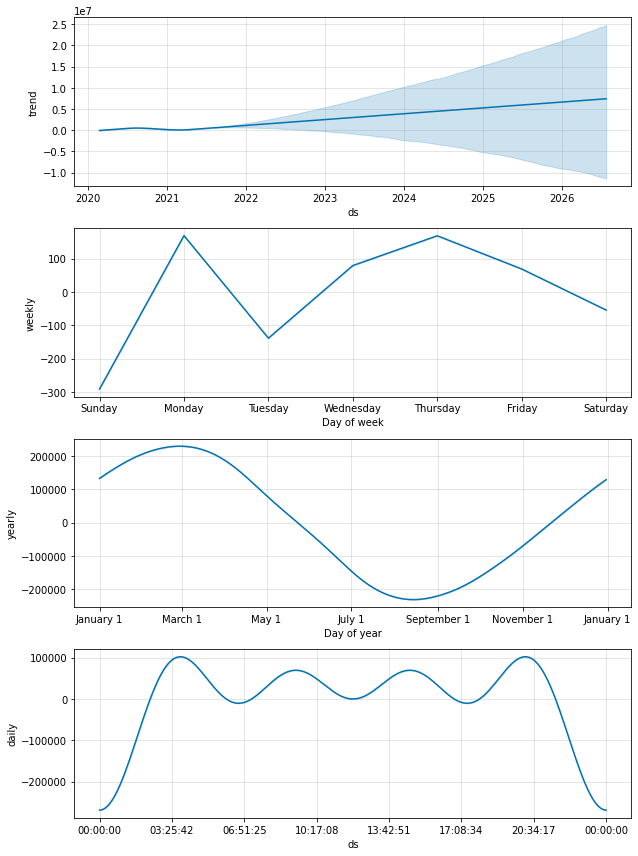

In [47]:
plot2 = m.plot_components(forecast)